<a href="https://colab.research.google.com/github/mikecorey/python101/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

Answers the question: but what if we put a layer on top of our lists of lists and tuples?

# Loading data


In [32]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')


Note: on your own environment (outside colab) you may need to pip install pandas

# Getting Statistics and metadata

Often we want to get a quick look at what our table looks like.  We can get either 5 or n rows depending on if we provide a parameter.

In [33]:
df.head() # Show the top 5 rows.
df.head(2)  # displays 2 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0


Often we'd like to see the full dimensions of our table.  We can do this with df.shape which returns a tuple.

In [34]:
df.shape  # Returns a tuple of Rows x Columns

(17000, 9)

We're frequently interested in seeing the columns in our dataset as well as any missing values, types etc.

In [35]:
df.info() # PRINTS the column descriptions, non null count, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


If we want quick statistics of our data. we can call .describe . This is incredibly useful for seeing ranges etc.



In [36]:
df.describe() # Displays aggregate statistics for each column
#df['longitude'].describe()  # if we just want stats for one column
# (This is a masterclass on __getitem__)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can also call .max, .mean etc. to just get one statistic

In [37]:
df.max()  #returns the max for columns

,0
longitude,-114.3100
latitude,41.9500
housing_median_age,52.0000
total_rooms,37937.0000
total_bedrooms,6445.0000
population,35682.0000
households,6082.0000
median_income,15.0001
median_house_value,500001.0000


Get just one column

In [48]:
df['latitude']

,latitude
0,34.19
1,34.40
2,33.69
3,33.64
4,33.57
...,...
16995,40.58
16996,40.69
16997,41.84
16998,41.80


Get a subset of columns...

In [49]:
df[['latitude','longitude']]

,latitude,longitude
0,34.19,-114.31
1,34.40,-114.47
2,33.69,-114.56
3,33.64,-114.57
4,33.57,-114.57
...,...,...
16995,40.58,-124.26
16996,40.69,-124.27
16997,41.84,-124.30
16998,41.80,-124.30


If we want to just do it for one column, we can filter by column

In [39]:
df['latitude'].median()

34.25

if we want a few columns we can use a list

In [41]:
df[['latitude', 'longitude']].mean()

,0
latitude,35.625225
longitude,-119.562108


If we need to get column names...

In [40]:
df.columns #prints the column names


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

And again if we need to get those types for each column, this is how...

In [10]:
df.dtypes #returns the datatypes for each column
#df['longitude'].dtypes #returns the datatypes for each column

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64


## Filtering Data
We'll want to filter on rows somewhat regularly...

In [57]:
df.head()
#df[df['housing_median_age'] > 20].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


We can do boolean queries also...


In [59]:
#df[df['housing_median_age'] > 20 & df['median_income'] > 3]. # Fails because we need parens to sort precedence

df[(df['housing_median_age'] > 20) & (df['median_income'] > 3)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
25,-115.32,32.82,34.0,591.0,139.0,327.0,89.0,3.6528,100000.0
26,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0
35,-115.41,32.99,29.0,1141.0,220.0,684.0,194.0,3.4038,107800.0
...,...,...,...,...,...,...,...,...,...
16982,-124.18,40.62,35.0,952.0,178.0,480.0,179.0,3.0536,107000.0
16986,-124.19,40.73,21.0,5694.0,1056.0,2907.0,972.0,3.5363,90100.0
16992,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0


# Modifying data
Let's look into modifying the data.  we can create columns from other columns.  At this point you're probably mad i didn't show you this on day one 😂

In [11]:
df['oblongitudinal'] = df['latitude'] + df['longitude']
# Note is actually added this abomination as a column.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,oblongitudinal
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-80.12
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-80.07
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-80.87
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-80.93
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-81.00


We can mo

In [12]:
df['oblongitudinal'] *= 100
# EACH TIME WE"RE MODIFYING THAT ROW.  STOP CLICKING PLAY!!!
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,oblongitudinal
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-8012.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-8007.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-8087.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-8093.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-8100.0


Unless there's a huge memory issue, best practice, make a copy.  Especially if something else might use the data.

In [29]:
df2 = df.copy()
df2['oblongitudinal'] *= 100
df2.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,oblongitudinal
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,-801200.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,-800700.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,-808700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,-809300.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,-810000.0


In [14]:
titanic_dataset = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
no_missing_titanic_dataset = titanic_dataset.dropna()
no_missing_titanic_dataset.info()
no_missing_titanic_dataset.shape[0] / titanic_dataset.shape[0]
# one fifth the size of original, perhaps a bit too cleaned.

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


0.2053872053872054

In [16]:
no_ageless_titanic_dataset = titanic_dataset.dropna(subset=['Age']) #age is key error, case matters!!!
no_ageless_titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [17]:
zeroed_titanic_dataset = titanic_dataset.fillna(0)
print('zeroed', zeroed_titanic_dataset['Age'].mean())
print('regular', titanic_dataset['Age'].mean())

# We dropped our age by 6 years by zeroing missing vals! What would work better?

zeroed 23.79929292929293
regular 29.69911764705882


In [18]:
deduped_titanic_dataset = titanic_dataset.drop_duplicates()
print(titanic_dataset.shape, deduped_titanic_dataset.shape)

# Nothing was dropped...

(891, 12) (891, 12)


In [19]:
titanic_dataset['Age'] = titanic_dataset['Age'].astype(str)
titanic_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [20]:
titanic_dataset.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,176,214
2,184,184,184,184,184,184,184,184,184,16,184
3,491,491,491,491,491,491,491,491,491,12,491


In [21]:
titanic_dataset.groupby('Pclass')['Fare'].median()


,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


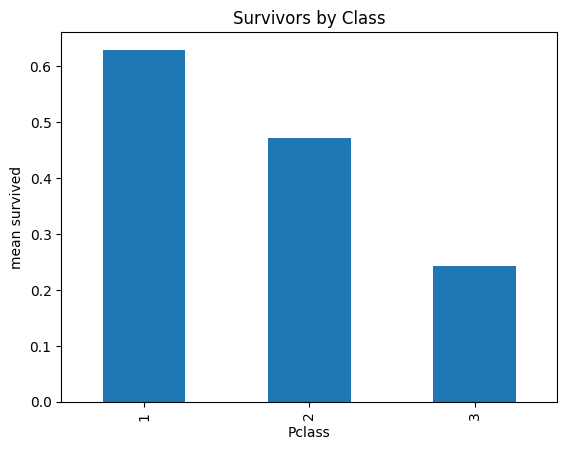

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic_dataset.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.ylabel("mean survived")
plt.title("Survivors by Class")
plt.show()

In [44]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 29],
    'Gender': ['F', 'M', 'M', 'M', 'F'],
    'Salary': [50000, 60000, 70000, 80000, 62000]
}

ex_df = pd.DataFrame(data)

# Exercises

## Q1 view the first 3 rows.

In [ ]:
# your solution

## Q2 Get the column names

In [ ]:
# your solution

# Q3 Show summary statistics means, quartiles, etc.

In [ ]:
# your solution

## Q4 Get the dimensions of the data frame

In [ ]:
# your solution

## Q5 Get all the names in the dataset


In [60]:
# your solution

## Q6 Find anyone older than 30

In [ ]:
# Your solution

## Q7 Find females who make more than $60k

In [ ]:
# Your solution

## Q8 What's the average salary?

In [ ]:
# Your solution

## Q9 Sort by age

In [ ]:
# your solution

## Q10 count the number of males and females

In [ ]:
# your solution

## Q11 Lowercase column names

In [ ]:
# your solution

## Q12 Age in 5 years Column

In [ ]:
# your solution

## Save to CSV

In [ ]:
# your solution